In [131]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [132]:
games = pandas.read_csv("games.csv")

In [133]:
print("\nNames of the columns in the games file:\n ", games.columns)
print("\nShape of the dataset: \n", games.shape)


Names of the columns in the games file:
  Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

Shape of the dataset: 
 (81312, 20)


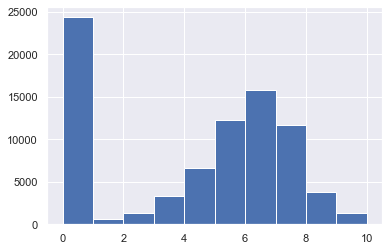

In [134]:
plt.hist(games["average_rating"])
plt.show()

As we can see here we have almost 24000 games with an average rating of zero. Along with that we have a skew to the right with an average pridiction of 6.

In [135]:
print("\nPrinting the first row of the game with a rating of zero:\n", games[games["average_rating"] == 0].iloc[0])
print("\nPrinting the first row of the game with a rating greater than zero:\n", games[games["average_rating"] > 0].iloc[0])


Printing the first row of the game with a rating of zero:
 id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object

Printing the first row of the game with a rating greater than zero:
 id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished    

It seems like that the first game "Looney Leo", never got published. Whereas, the second game titled "Twilight Struggle" is really popular.

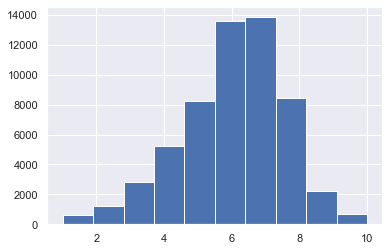

In [136]:
#Removing all rows without any user review
games = games[games["users_rated"] > 0]

#Removing rows with missing values
games = games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show()

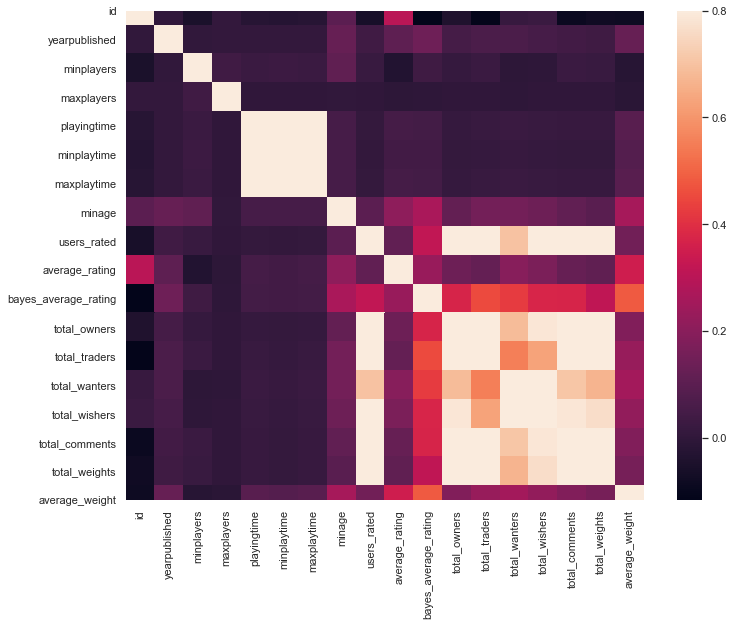

In [137]:
corrmat = games.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax = .8, square=True)
plt.show()

According to the above heatmap average_rating is related to id, bayes_average_rating, average_weight. Since bayes_average_rating is based of on average_rating it should be removed. Along with that id, type and name should be removed because all of those fields are not really characteristic of the game but since they are highly correlated they are going to impact the results of machine learning algorithm.

In [138]:
#Get all the columns from the dataframe
columns = games.columns.tolist()

#Filter the columns to remove the data that we do not need
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

#Storing target
target = "average_rating"

In [139]:
df = pandas.DataFrame(games)
target_CV = df['average_rating']
input_data_CV = df[columns]
X = input_data_CV
y = target_CV

#### Spliting training and testing data

In [140]:
train = games.sample(frac=0.8, random_state=1)
test = games.loc[~games.index.isin(train.index)]

#Checking if the data is divided properly
print("\nShape of training set: ", train.shape, "\nShape of test set: ", test.shape)


Shape of training set:  (45515, 20) 
Shape of test set:  (11379, 20)


#### Linear Regression Model

In [141]:
#Liner Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

LR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
#Predictions for testing set
predictions = LR.predict(test[columns])

#Compare error between test pridictions and actual values
mean_squared_error(predictions,test[target])

2.0788190326293243

In [143]:
#Performing 10 cross validation
prediction_TF = cross_val_predict(LR, X, y, cv=10)
mean_squared_error(prediction_TF,y)

2.858811159462091

This mean squared error is not bad but not great as well. This data is farely complex so there is not a liner model which it would fit perfectly. With average_rating feature no other feature was strongly related hence it is not suprising to see that non linear data does not fit it perfectly. So now, the same should be tested with a non-linear model to see how much better it does over the linear model.

#### Random Forest Regression Model

In [144]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf=10, random_state=1)
RFR.fit(train[columns], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [145]:
predictions = RFR.predict(test[columns])
#Compare error between test pridictions and actual values
mean_squared_error(predictions,test[target])

1.4458560046071653

In [146]:
#Performing 10 cross validation
prediction_TF = cross_val_predict(RFR, X, y, cv=10)
mean_squared_error(prediction_TF,y)

1.5975792430665043

Here with a non-linear model, the prediction is certainly better than the linear model.

#### Comparision between Linear and Non-Linear Model

In [147]:
#Prections with both models
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [148]:
test[target].iloc[0]

8.07933

#### Decision Tree Regression Model

In [149]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
DTR = DecisionTreeRegressor(max_depth=5)

DTR.fit(train[columns], train[target])

# Predict
predictions = DTR.predict(test[columns])

#Compare error between test pridictions and actual values
mean_squared_error(predictions,test[target])

1.688394277901985

In [150]:
#Performing 10 cross validation
prediction_TF = cross_val_predict(DTR, X, y, cv=10)
mean_squared_error(prediction_TF,y)

1.790591612248838

#### K Nearest Neighbour Regression Model

In [174]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(train[columns], train[target])
# Predict
predictions = KNN.predict(test[columns])

#Compare error between test pridictions and actual values
mean_squared_error(predictions,test[target])

1.9468866492442287

In [176]:
#Performing 10 cross validation
prediction_TF = cross_val_predict(KNN, X, y, cv=10)
mean_squared_error(prediction_TF,y)

2.2524988063866576

Trying with 5 Nearest Neighbours:

In [177]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(train[columns], train[target])
# Predict
predictions = KNN.predict(test[columns])

#Compare error between test pridictions and actual values
mean_squared_error(predictions,test[target])

1.791084001547584

In [178]:
#Performing 10 cross validation
prediction_TF = cross_val_predict(KNN, X, y, cv=10)
mean_squared_error(prediction_TF,y)

2.061911276094824

#### Rule Based Regression Model

In [153]:
from sklearn.dummy import DummyRegressor
DR = DummyRegressor(strategy="mean")
DR.fit(train[columns], train[target])
# Predict
predictions = DR.predict(test[columns])

#Compare error between test pridictions and actual values
mean_squared_error(predictions,test[target])

2.493049696047476

In [154]:
#Performing 10 cross validation
prediction_TF = cross_val_predict(DR, X, y, cv=10)
mean_squared_error(prediction_TF,y)

2.5900791281138766

In [155]:
#Prections with all models for a particular game located at the 1st position in the dataframe
rating_LR = LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_DTR = DTR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_KNN = KNN.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_DR = DR.predict(test[columns].iloc[0].values.reshape(1,-1))

print("Linear Regression: ", rating_LR)
print("Random Forest Regressor: ", rating_RFR)
print("Decision Tree Regressor: ", rating_DTR)
print("K Nearest Neighbour: ", rating_KNN)
print("Mean Rule Based Dummy Classifier: " ,rating_DR)

#Actual average rating for this game
print("\nActual Average Rating: ")
test[target].iloc[0]

Linear Regression:  [8.12061283]
Random Forest Regressor:  [7.91373581]
Decision Tree Regressor:  [7.62106197]
K Nearest Neighbour:  [8.03524]
Mean Rule Based Dummy Classifier:  [6.01610123]

Actual Average Rating: 


8.07933

##### KNN > Linear Regression > Random Forest > Decision Tree > Rule Based

In [156]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [157]:
#Prections with all models for a particular game located at the 5001st position in the dataframe
rating_LR = LR.predict(test[columns].iloc[5001].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[5001].values.reshape(1,-1))
rating_DTR = DTR.predict(test[columns].iloc[5001].values.reshape(1,-1))
rating_KNN = KNN.predict(test[columns].iloc[5001].values.reshape(1,-1))
rating_DR = DR.predict(test[columns].iloc[5001].values.reshape(1,-1))

print("Linear Regression: ", rating_LR)
print("Random Forest Regressor: ", rating_RFR)
print("Decision Tree Regressor: ", rating_DTR)
print("K Nearest Neighbour: ", rating_KNN)
print("Mean Rule Based Dummy Classifier: " ,rating_DR)

#Actual average rating for this game
print("\nActual Average Rating: ")
test[target].iloc[5001]

Linear Regression:  [5.64830228]
Random Forest Regressor:  [5.25339867]
Decision Tree Regressor:  [5.53443878]
K Nearest Neighbour:  [3.]
Mean Rule Based Dummy Classifier:  [6.01610123]

Actual Average Rating: 


4.0

##### KNN > Random Forest > Decison Tree > Linear Regression > Rule Based

In [158]:
test[columns].iloc[5001]

yearpublished      0.0
minplayers         2.0
maxplayers        10.0
playingtime       10.0
minplaytime       10.0
maxplaytime       10.0
minage             0.0
users_rated        3.0
total_owners       2.0
total_traders      0.0
total_wanters      0.0
total_wishers      0.0
total_comments     2.0
total_weights      1.0
average_weight     2.0
Name: 27606, dtype: float64

In [159]:
#Prections with all models for a particular game located at the 11370st position in the dataframe
rating_LR = LR.predict(test[columns].iloc[11370].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[11370].values.reshape(1,-1))
rating_DTR = DTR.predict(test[columns].iloc[11370].values.reshape(1,-1))
rating_KNN = KNN.predict(test[columns].iloc[11370].values.reshape(1,-1))
rating_DR = DR.predict(test[columns].iloc[11370].values.reshape(1,-1))

print("Linear Regression: ", rating_LR)
print("Random Forest Regressor: ", rating_RFR)
print("Decision Tree Regressor: ", rating_DTR)
print("K Nearest Neighbour: ", rating_KNN)
print("Mean Rule Based Dummy Classifier: " ,rating_DR)

#Actual average rating for this game
print("\nActual Average Rating: ")
test[target].iloc[11370]

Linear Regression:  [6.10392951]
Random Forest Regressor:  [7.28359215]
Decision Tree Regressor:  [6.86958652]
K Nearest Neighbour:  [8.1]
Mean Rule Based Dummy Classifier:  [6.01610123]

Actual Average Rating: 


8.2

##### KNN > Random Forest > Decision Tree > Linear Regression > Rule Based

In [160]:
test[columns].iloc[11370]

yearpublished     2015.0
minplayers           2.0
maxplayers           6.0
playingtime         60.0
minplaytime         60.0
maxplaytime         60.0
minage              13.0
users_rated          5.0
total_owners        48.0
total_traders        0.0
total_wanters        1.0
total_wishers        2.0
total_comments       2.0
total_weights        1.0
average_weight       1.0
Name: 81176, dtype: float64

In [161]:
#Prections with all models for a particular game located at the 9370st position in the dataframe
rating_LR = LR.predict(test[columns].iloc[10].values.reshape(1,-1))
rating_RFR = RFR.predict(test[columns].iloc[10].values.reshape(1,-1))
rating_DTR = DTR.predict(test[columns].iloc[10].values.reshape(1,-1))
rating_KNN = KNN.predict(test[columns].iloc[10].values.reshape(1,-1))
rating_DR = DR.predict(test[columns].iloc[10].values.reshape(1,-1))

print("Linear Regression: ", rating_LR)
print("Random Forest Regressor: ", rating_RFR)
print("Decision Tree Regressor: ", rating_DTR)
print("K Nearest Neighbour: ", rating_KNN)
print("Mean Rule Based Dummy Classifier: " ,rating_DR)

#Actual average rating for this game
print("\nActual Average Rating: ")
test[target].iloc[10]

Linear Regression:  [8.40216505]
Random Forest Regressor:  [7.45198331]
Decision Tree Regressor:  [6.89172092]
K Nearest Neighbour:  [7.537935]
Mean Rule Based Dummy Classifier:  [6.01610123]

Actual Average Rating: 


7.82838

##### KNN > Random Forest > Linear Regression > Decision Tree > Rule Based

In [162]:
test[columns].iloc[10]

yearpublished     2006.0000
minplayers           2.0000
maxplayers           2.0000
playingtime         60.0000
minplaytime         60.0000
maxplaytime         60.0000
minage              12.0000
users_rated       6080.0000
total_owners      7770.0000
total_traders      213.0000
total_wanters      574.0000
total_wishers     2057.0000
total_comments    2204.0000
total_weights      943.0000
average_weight       2.6914
Name: 48, dtype: float64